In [3]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
city_ride_df = pd.merge(city_data_df, ride_data_df, on="city")

# Display the data table for preview
city_ride_df.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [4]:
#City Names
city = city_data_df.city

#Average Fare ($) Per City
fare_means = city_ride_df.groupby("city")["fare"].mean()

#Total Number of Rides Per City
sum_rides = city_ride_df.groupby("city")["ride_id"].count()

#Total Number of Drivers Per City
sum_drivers = city_data_df.set_index('city')["driver_count"]

#City Type (Urban, Suburban, Rural)
city_types = city_data_df.set_index('city')["type"]

In [5]:
all_metrics_df = pd.DataFrame(
    {"Average Fare": fare_means,
     "Total Rides": sum_rides,
     "Total Drivers": sum_drivers,
     "City Types": city_types})  

all_metrics_df.head()

,Average Fare,Total Rides,Total Drivers,City Types
Amandaburgh,24.641667,18,12,Urban
Barajasview,25.332273,22,26,Urban
Barronchester,36.422500,16,11,Suburban
Bethanyland,32.956111,18,22,Suburban
Bradshawfurt,40.064000,10,7,Rural


In [6]:
#UrbanData
urban_type = all_metrics_df.loc[all_metrics_df["City Types"]== "Urban"]

#SuburbanData
suburban_type = all_metrics_df.loc[all_metrics_df["City Types"]== "Suburban"]

#RuralData
rural_type = all_metrics_df.loc[all_metrics_df["City Types"]== "Rural"]

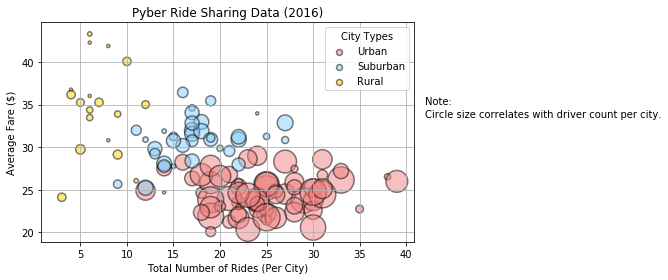

In [7]:
# Obtain the x and y coordinates for each of the three city types
# Build the scatter plots for each city types
# Incorporate the other graph properties

#UrbanScatterPlot
plt.scatter(urban_type["Total Rides"], urban_type["Average Fare"], color = "lightcoral", edgecolors="black", 
            s = urban_type["Total Drivers"]*10, label = "Urban", alpha = 0.5, linewidth = 1.5)

#SuburbanScatterPlot
plt.scatter(suburban_type["Total Rides"], suburban_type["Average Fare"], color = "lightskyblue", edgecolors ="black", 
            s = suburban_type["Total Drivers"]*10, label = "Suburban", alpha = 0.5, linewidth = 1.5)

#RuralScatterPlot
plt.scatter(rural_type["Total Rides"], rural_type["Average Fare"], color = "gold", edgecolors = "black", 
            s = rural_type["Total Drivers"]*10, label = "Rural", alpha = 0.5, linewidth = 1.5)

#Add title, x axis label and y axis label.
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.text(42, 35,"Note:")
plt.text(42, 33.5,"Circle size correlates with driver count per city.")

# Create a legend
# Incorporate a text label regarding circle size
plot_legend = plt.legend(loc="upper right", title="City Types")
plot_legend.legendHandles[0]._sizes = [35]
plot_legend.legendHandles[1]._sizes = [35]
plot_legend.legendHandles[2]._sizes = [35]

plt.tight_layout()
plt.grid()

# Show plot
plt.show()

## Total Fares by City Type

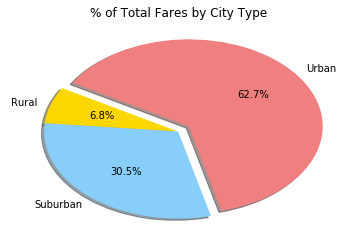

In [27]:
# Calculate Type Percents
#Grouping by type in the effort to be able to use in all charts created
type_group = city_ride_df.groupby('type')['type', 'fare', 'ride_id', 'driver_count']

#total fare by city
fare_by_city = type_group.sum()['fare']

# Build Pie Chart
labels = fare_by_city.index

#create color scheme that will be used for all charts and explode
colorsbycity = {'Urban': 'lightcoral', 'Suburban': 'lightskyblue', 'Rural': 'gold'}
colors = [colorsbycity[n] for n in labels]
explode = [0 , 0, .1]
plt.pie(fare_by_city, startangle = 150, colors = colors, explode = explode, labels = labels, autopct = "%1.1f%%", shadow = True)

#Final Pie Chart Displayed with Title and equal axis
plt.title('% of Total Fares by City Type')
plt.show()

## Total Rides by City Type

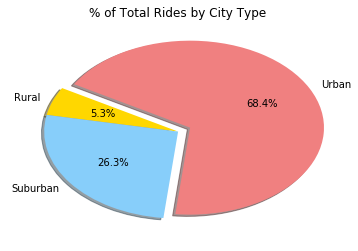

In [33]:
#total rides by city
ride_by_city = type_group.count()['ride_id']

# Build Pie Chart
labels = ride_by_city.index
plt.pie(ride_by_city, startangle = 150, colors = colors, explode = explode, labels = labels, autopct = "%1.1f%%", shadow = True)

#Final Pie Chart Displayed with Title and equal axis
plt.title('% of Total Rides by City Type')
plt.show()

## Total Drivers by City Type

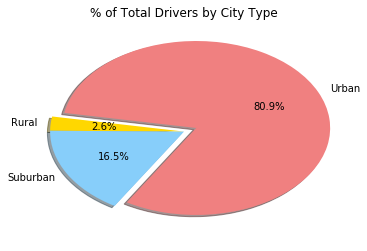

In [35]:
#total drivers by city
driver_by_city = city_data_df.groupby('type').sum()['driver_count']

# Build Pie Chart
labels = driver_by_city.index
plt.pie(driver_by_city, startangle = 170, colors = colors, explode = explode, labels = labels, autopct = "%1.1f%%", shadow = True)

#Final Pie Chart Displayed with Title and equal axis
plt.title('% of Total Drivers by City Type')
plt.show()